In [1]:
#Imports, set cuda device, configure tensor board

import torch
from datasets import SequenceDataset
from torchvision.transforms import v2, InterpolationMode
from modules.ego_motion_filter import EgoMotionFilter
from modules.geometry_filter import GeometryFilter
import util

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

from torch.utils.tensorboard import SummaryWriter
import os
import shutil


TBOARD_LOGS = os.path.join(os.getcwd(), "tboard_logs", "full_training")
if not os.path.exists(TBOARD_LOGS):
    os.makedirs(TBOARD_LOGS)
shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

cuda


In [2]:
root_dir = "/home/nfs/inf6/data/datasets/Carla_Moritz/SyncAngel3/"

transforms = v2.Compose([
    v2.Resize((256, 512), InterpolationMode.BILINEAR, antialias=False),
    v2.ToDtype(torch.float, scale=True),
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = SequenceDataset(root_dir, transform=transforms, split='train')
valid_dataset = SequenceDataset(root_dir, transform=transforms, split='validation')


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=1)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=1)


geometry_filter = GeometryFilter(use_cuda=True).to(device)
#geometry_filter.load_depth_weights('models/depth_epoch_6.pth')
#geometry_filter.load_segmenter_weights('models/segmenter_epoch_18.pth')
ego_motion = EgoMotionFilter().to(device)
#ego_motion.load_pretrained('models/ego_motion_proc_19.pth')
util.load_model('models/sequence_ep_0.pth', geometry_filter=geometry_filter, ego_motion=ego_motion)
geometry_filter.eval()


OutOfMemoryError: CUDA out of memory. Tried to allocate 288.00 MiB. GPU 0 has a total capacty of 23.69 GiB of which 829.88 MiB is free. Process 1113566 has 18.62 GiB memory in use. Including non-PyTorch memory, this process has 4.19 GiB memory in use. Of the allocated memory 3.93 GiB is allocated by PyTorch, and 10.47 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

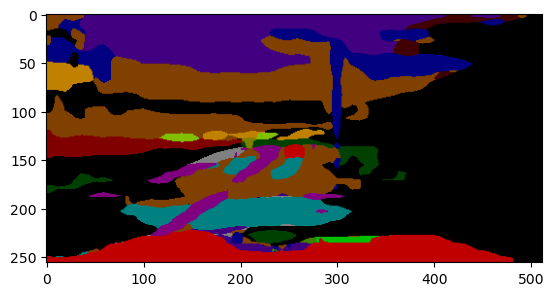

In [11]:
import visualizations.segmentation_utils as segmentation_utils
import matplotlib.pyplot as plt

image, seg, depth, _ = next(iter(train_loader))
image, seg, depth = image[0,0,...].unsqueeze(dim=0), seg[0,0,...].unsqueeze(dim=0), depth[0,0,...].unsqueeze(dim=0)
pred_seg, pred_depth, _, _ = geometry_filter(image.to(device))
pred_seg_soft = pred_seg.softmax(dim=1)
segmentation_map = segmentation_utils.draw_segmentation_map(pred_seg_soft[0])
plt.imshow(segmentation_map)


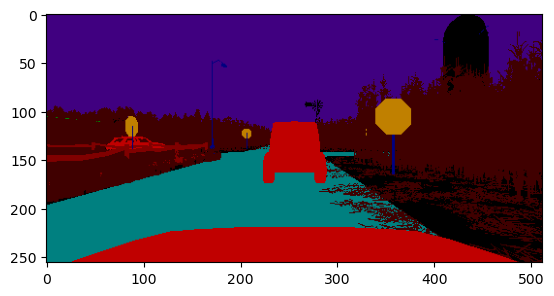

In [19]:
plt.imshow(segmentation_utils.draw_mask(seg[0]))

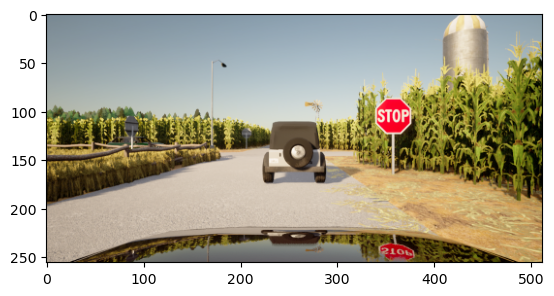

In [20]:
plt.imshow(image[0].permute(1,2,0))

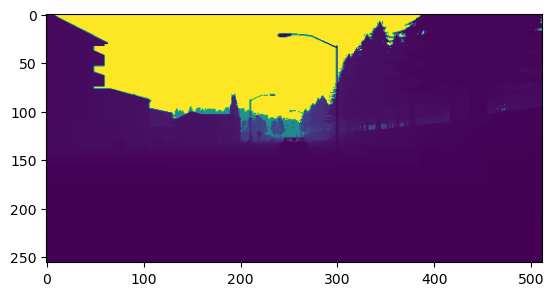

In [12]:
plt.imshow(depth[0][0])#.permute(1,2,0))

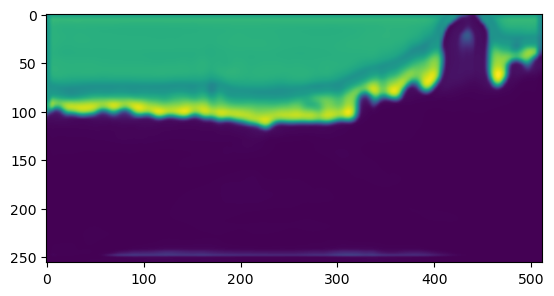

In [22]:
plt.imshow(pred_depth[0][0].cpu().detach())

In [ ]:
numbers = [1, 2, 3, 4, 5]
[sum(numbers[:i]) for i in range(len(numbers))]

[0, 1, 3, 6, 10]

In [ ]:
[sum(numbers[:j]) for j in [len(train_dataset.excluded_sequences[i]) * 20 for i in train_dataset.towns[:3]]]

[0, 20, 0]

In [ ]:
a = [30000 - len(train_dataset.excluded_sequences[i]) * 20 for i in train_dataset.towns]
print(a)
b = [sum(a[:i+1]) for i in range(len(a))]
c = [i > idx for i in b].index(True)
print(b)
idx = 30000
c
[b[i-1] if i>0 else 0 for i in range(len(b))]

[30000, 29980, 30000, 30000, 30000, 30000]
[30000, 59980, 89980, 119980, 149980, 179980]


[0, 30000, 59980, 89980, 119980, 149980]

In [ ]:
[i > idx for i in b]

[False, True, True]

In [ ]:
a[:9]

[30000, 29980, 30000, 30000, 30000, 30000]

In [ ]:
def get_entry(x, excluded_values):
    """
    Get the xth entry from a list of numbers with certain excluded values.

    Parameters:
        x (int): The index of the entry to retrieve.
        excluded_values (list): List of values to be excluded from the list.

    Returns:
        int: The xth entry from the list.
    """
    # Adjust the index based on the number of excluded values that come before it
    adjusted_index = x + len([val for val in excluded_values if val <= x])


    return adjusted_index

# Example usage:

x = 6  # Index of the entry to retrieve
result = get_entry(x, excluded_values)
print(f"The {x}th entry is: {result}")

The 6th entry is: 7


In [ ]:
y = 5
excluded_values = [4, 1]  # Define excluded values
[x for x in range(y + len(excluded_values) + 1) if x not in excluded_values][y]

7

In [ ]:
train_dataset[59919]

/home/nfs/inf6/data/datasets/Carla_Moritz/SyncAngel3/Town03/seq_1496/img_019.png


(tensor([[[0.2196, 0.0941, 0.0000,  ..., 0.0275, 0.0157, 0.0510],
          [0.2196, 0.0902, 0.0000,  ..., 0.0275, 0.0157, 0.0392],
          [0.2353, 0.0941, 0.0000,  ..., 0.0510, 0.0392, 0.0157],
          ...,
          [0.0941, 0.0863, 0.0863,  ..., 0.2118, 0.2196, 0.2157],
          [0.0863, 0.0863, 0.1059,  ..., 0.2118, 0.2118, 0.2196],
          [0.0941, 0.0941, 0.1059,  ..., 0.2078, 0.2039, 0.2039]],
 
         [[0.1882, 0.0824, 0.0000,  ..., 0.0000, 0.0000, 0.0157],
          [0.1843, 0.0706, 0.0000,  ..., 0.0000, 0.0157, 0.0000],
          [0.1961, 0.0549, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0627, 0.0784, 0.0627,  ..., 0.1765, 0.1804, 0.1843],
          [0.0784, 0.0784, 0.0784,  ..., 0.1765, 0.1725, 0.1843],
          [0.0784, 0.0784, 0.0784,  ..., 0.1725, 0.1725, 0.1686]],
 
         [[0.1059, 0.0275, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.1059, 0.0392, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.1176, 0.0353, 0.0000,  ...,

In [ ]:
train_dataset.cum_images

[30000, 59980, 89980, 119980, 149980, 179980]

In [ ]:
idx = 0
town_index = [i > idx for i in train_dataset.cum_images].index(True)
town = train_dataset.towns[town_index]
excluded = train_dataset.excluded_sequences[town]
start_indices = [train_dataset.cum_images[i-1] if i>0 else 0 for i in range(len(train_dataset.cum_images))]
image_num_in_town = idx - start_indices[town_index]
sequence = (image_num_in_town) // 20

In [ ]:
sequence

0

In [ ]:
import numpy as np

np.load("/home/nfs/inf6/data/datasets/Carla_Moritz/SyncAngel3/Town01/seq_0001/optical_flow_000.npy").shape

(512, 1024, 2)

In [ ]:
import pickle

with open('/home/nfs/inf6/data/datasets/Carla_Moritz/SyncAngel3/Town01/seq_0001/meta.pkl', 'rb') as f:
    data = pickle.load(f)


[[[-0.0024863688740879297,
   -0.9999969005584717,
   -0.00022413748956751078,
   392.2984619140625],
  [0.9999886155128479,
   -0.0024854373186826706,
   -0.004065237939357758,
   106.20295715332031],
  [0.004064667969942093,
   -0.0002342426305403933,
   0.9999917149543762,
   1.3939177989959717],
  [0.0, 0.0, 0.0, 1.0]],
 [[-0.0017084021819755435,
   -0.9999985098838806,
   -0.00032532549812458456,
   392.2980041503906],
  [0.9999815821647644,
   -0.001706478069536388,
   -0.0058255731128156185,
   107.02346801757812],
  [0.005825009196996689,
   -0.0003352718777023256,
   0.9999829530715942,
   1.3952901363372803],
  [0.0, 0.0, 0.0, 1.0]],
 [[-0.0010659906547516584,
   -0.9999993443489075,
   -0.0002934445219580084,
   392.29779052734375],
  [0.9999784827232361,
   -0.0010640696855261922,
   -0.006470235530287027,
   107.88467407226562],
  [0.006469919346272945,
   -0.00030033543589524925,
   0.9999790191650391,
   1.3957878351211548],
  [0.0, 0.0, 0.0, 1.0]],
 [[-0.000697289186064

In [ ]:
len(data['extrinsics'])

20

In [4]:
checkpoint = torch.load('models/ego_motion_epoch_19.pth')

In [1]:
import torch
from datasets import SequenceDataset
from torchvision.transforms import v2, InterpolationMode
import augmentations

root_dir = "/home/nfs/inf6/data/datasets/Carla_Moritz/SyncAngel3/"

transforms = v2.Compose([
    v2.Resize((256, 512), InterpolationMode.BILINEAR, antialias=False),
    v2.ToDtype(torch.float, scale=True),
    #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_augmentations = v2.Compose([
    augmentations.AddGaussianNoise(0.05),
    #v2.ColorJitter(brightness=.5, hue=.3)
    augmentations.change_lighting(),
    augmentations.RandomAddClutter(p=1, scale=(0.02,0.1))
])

valid_dataset = SequenceDataset(root_dir, transform=transforms, image_augmentations=image_augmentations, split='validation')

In [2]:
from visualizations.save_gif import save_tensors_as_gif

images, _, depth, _ = valid_dataset[0]
images = images.unbind()
depth = depth.unbind()

In [3]:
save_tensors_as_gif(images, 'gify.gif')

In [4]:
from visualizations.save_image import save_image

save_image(images[0], 'im.jpg')

In [6]:
save_image(depth[0], 'dp.jpg')

In [7]:
depth[0]

tensor([[[8.9951e+03, 8.9951e+03, 8.9951e+03,  ..., 6.5536e+04,
          6.5536e+04, 6.5536e+04],
         [8.9951e+03, 8.9951e+03, 8.9951e+03,  ..., 6.5536e+04,
          6.5536e+04, 6.5536e+04],
         [8.9951e+03, 8.9951e+03, 8.9951e+03,  ..., 6.5536e+04,
          6.5536e+04, 6.5536e+04],
         ...,
         [2.4473e-03, 2.4498e-03, 2.4522e-03,  ..., 2.6307e-03,
          2.6194e-03, 2.6084e-03],
         [2.4333e-03, 2.4309e-03, 2.4285e-03,  ..., 2.6446e-03,
          2.6319e-03, 2.6202e-03],
         [2.4101e-03, 2.4101e-03, 2.4100e-03,  ..., 2.6494e-03,
          2.6395e-03, 2.6257e-03]]])

In [16]:
a = torch.as_tensor([0.1,0.1, 0.2], dtype=torch.float)

In [17]:
b  = a * 2

In [18]:
b

tensor([0.2000, 0.2000, 0.4000])

In [19]:
a - b

tensor([-0.1000, -0.1000, -0.2000])

In [ ]:
torch.mean(image[0], 

In [3]:
image[0].shape

NameError: name 'image' is not defined